In [1]:
srand(1);
using Distributions
m = 5;
n = 24;
SCALE = 10000;
B = rand(LogNormal(8), m) + 10000;
B = round(B, 3);

P_ad = rand(m);
P_time = rand(1,n);
P = P_ad * P_time;

T = sin(linspace(-2*pi/2, 2*pi-2*pi/2, n)) * SCALE;
T += -minimum(T) + SCALE;
c = rand(m);
c *= 0.6*sum(T)/sum(c);
c = round(c, 3);
R = [rand(LogNormal(minimum(c)/c[i]), 1) for i=1:m];

In [2]:
# Form and solve the optimal advertising problem.
using Convex, SCS;
D = Variable(m, n);
Si = [min(R[i]*P[i,:]*D[i,:]', B[i]) for i=1:m];
problem = maximize(sum(Si),
               [D >= 0, sum(D,1)' <= T, sum(D,2) >= c]);
solve!(problem, SCSSolver(verbose=0));

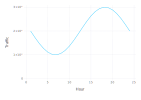

In [3]:
# Plot traffic.
using Gadfly
plot(x=1:length(T), y=T, Geom.line, Guide.XLabel("Hour"), Guide.YLabel("Traffic"))

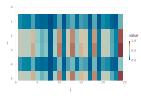

In [4]:
# Plot P.
spy(P)

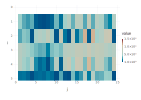

In [5]:
# Plot optimal D.
spy(evaluate(D))